In [1]:
import numpy as np
from pbil import PBIL
import matplotlib.pyplot as plt

In [2]:
def init_weights(N):
    weights = np.random.choice([-1,1], size = (N, N))
    weights = weights - np.diag(np.diag(weights))
    weights = np.tril(weights) + np.tril(weights, -1).T
    return weights

def dict_to_str(params, changed_params=None):
    if changed_params is None:
        return ','.join([f'{k}={v}' for k,v in params.items()])
    else:
        return ','.join([f'{k}={v}' for k,v in params.items() if k in changed_params])

def generate_param_dict(iterations,population_size,sample_frac,learning_rate):
    params = {
        'iterations': iterations,
        'population_size': population_size,
        'sample_frac': sample_frac,
        'learning_rate': learning_rate
    }
    return params

In [3]:
N = 100
weights = init_weights(N)

# PBIL with different parameter values (iterations, population size, fraction of population used to update distribution, learning rate) on the same problem

In [4]:
# [1,5,10,..95,100]
iterations = np.array([5 * i for i in range(21)],dtype=int)

# [10,15,20,..95,100]
population_size = np.arange(10,100,5,dtype=int)

# [0.01,0.05,0.1,0.15,...0.95]
sample_fracs = [ (5 * i) / 100 for i in range(1,21)]
sample_fracs.insert(0,0.01)
sample_fracs = np.array(sample_fracs,dtype=float)

# [0.05,0.10,...,0.95]
learning_rates = np.arange(0.05,1.0,0.05,dtype=float)

In [5]:
def collect_results(weights,num_runs,iteration_values,population_size_values,sample_frac_values,learning_rate_values):
    results = []

    # Take random samples from the range of possible values for each parameter
    iterations = np.random.choice(iteration_values,size=num_runs)
    population_sizes = np.random.choice(population_size_values,size=num_runs)
    sample_fracs = np.random.choice(sample_frac_values,size=num_runs)
    learning_rates = np.random.choice(learning_rate_values,size=num_runs)

    for iter,p_size,sample_f,l_rate in zip(iterations,population_sizes,sample_fracs,learning_rates):
        params = generate_param_dict(iter,p_size,sample_f,l_rate)
        print(params)
        model = PBIL(weights)
        iteration_energies = model.run(iter,p_size,sample_f,l_rate)
        results.append((iteration_energies,params))
    return results

In [6]:
num_runs = 5
results = collect_results(weights,num_runs,iterations,population_size,sample_fracs,learning_rates)

{'iterations': 20, 'population_size': 45, 'sample_frac': 0.7, 'learning_rate': 0.8}
{'iterations': 55, 'population_size': 15, 'sample_frac': 0.25, 'learning_rate': 0.5}
{'iterations': 90, 'population_size': 20, 'sample_frac': 0.6, 'learning_rate': 0.7500000000000001}
{'iterations': 95, 'population_size': 50, 'sample_frac': 0.15, 'learning_rate': 0.15000000000000002}
{'iterations': 55, 'population_size': 15, 'sample_frac': 0.6, 'learning_rate': 0.6500000000000001}


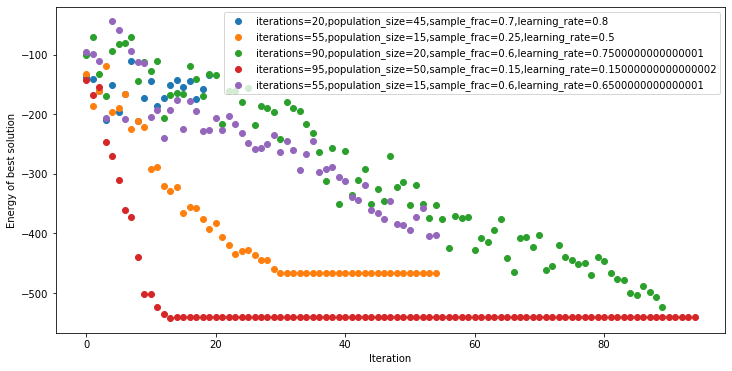

In [7]:
fig, ax = plt.subplots(figsize=[12,6])

for sample_energies, params in results:
    params_str = dict_to_str(params)
    ax.scatter(range(len(sample_energies)),[min(e) for e in sample_energies],label=params_str)

ax.set_xlabel('Iteration')
ax.set_ylabel('Energy of best solution')
ax.legend(loc='upper right')
plt.show()

# Changing Learning Rate

In [8]:
iterations = 100
population_size = 25
sample_frac = 0.2
learning_rates = np.arange(0.1,1.0,0.1,dtype=float)

In [9]:
learning_rates

array([0.5, 0.6, 0.7, 0.8, 0.9])

In [10]:
def collect_results(weights,learning_rates,iterations,population_size,sample_frac):
    results = []
    for learning_rate in learning_rates:
        params = generate_param_dict(iterations,population_size,sample_frac,learning_rate)
        print(params)
        model = PBIL(weights)
        iteration_energies = model.run(iterations,population_size,sample_frac,learning_rate)
        results.append((iteration_energies,params))
    return results

In [11]:
results = collect_results(weights,learning_rates,iterations,population_size,sample_frac)

{'iterations': 100, 'population_size': 25, 'sample_frac': 0.2, 'learning_rate': 0.5}
{'iterations': 100, 'population_size': 25, 'sample_frac': 0.2, 'learning_rate': 0.6}
{'iterations': 100, 'population_size': 25, 'sample_frac': 0.2, 'learning_rate': 0.7}
{'iterations': 100, 'population_size': 25, 'sample_frac': 0.2, 'learning_rate': 0.7999999999999999}
{'iterations': 100, 'population_size': 25, 'sample_frac': 0.2, 'learning_rate': 0.8999999999999999}


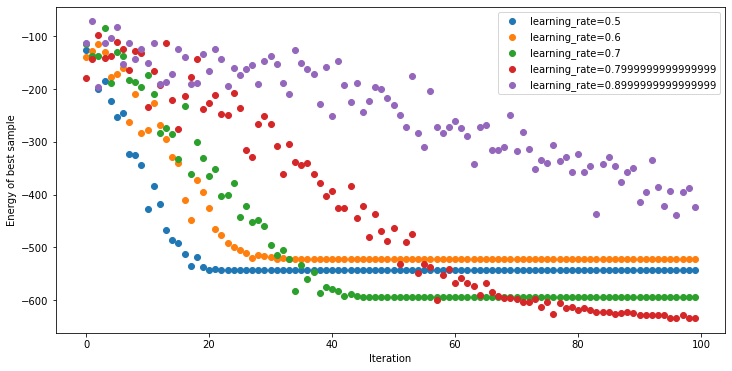

In [12]:
fig, ax = plt.subplots(figsize=[12,6])

for iteration_energies, params in results:
    params_str = dict_to_str(params,['learning_rate'])
    ax.scatter(range(len(iteration_energies)),[min(e) for e in iteration_energies],label=params_str)

ax.set_xlabel('Iteration')
ax.set_ylabel('Energy of best sample')
ax.legend(loc='upper right')
plt.show()